# HW5 - Daniel Grossman

## Clinical data

In [1]:
#importing our packages
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt

#changing working directory
os.chdir('/Users/danielgrossman/Documents/Coursework/BMI 312/Data/')

BRCA.clinical.short.txt ...

gender
female    1096
male        12
Name: gender, dtype: int64

Range for age at diagnosis: 63.49999999999999


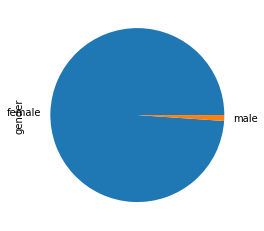

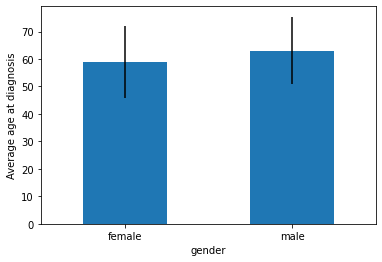

ACC.clinical.short.txt ...

gender
female    48
male      31
Name: gender, dtype: int64

Range for age at diagnosis: 62.8


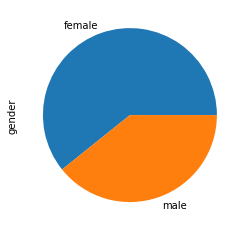

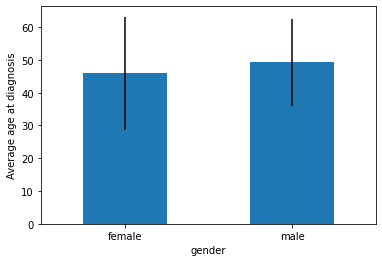

SKCM.clinical.short.txt ...

gender
female    179
male      292
Name: gender, dtype: int64

Range for age at diagnosis: 74.5


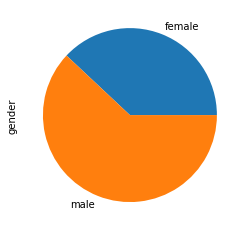

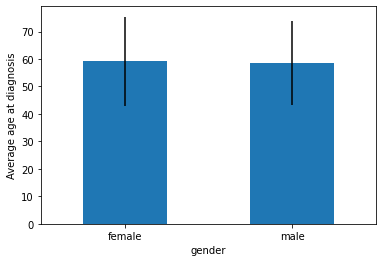

LAML.clinical.short.txt ...

gender
female    68
male      83
Name: gender, dtype: int64

Range for age at diagnosis: 67.0


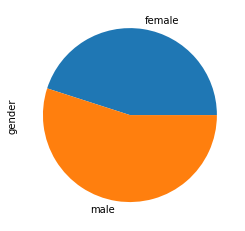

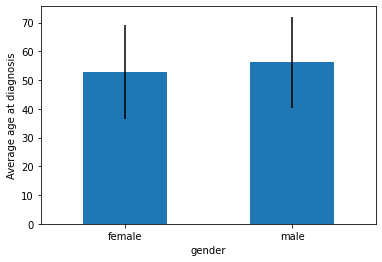

In [2]:
files = os.listdir('/Users/danielgrossman/Documents/Coursework/BMI 312/Data/')

for f in files:
    if (f.endswith('.clinical.short.txt')): #for each clinical short file...
        print(f, '...\n')
        clinical = pd.read_csv(f, sep='\t')
        
        #counts
        print(clinical.groupby('gender').gender.count())
        print('\nRange for age at diagnosis:', max(clinical.age_at_diagnosis)-min(clinical.age_at_diagnosis))
        clinical.groupby('gender').gender.count().plot(kind='pie'); plt.show() #pie chart
        
        #bar chart comparing avg age at diagnosis between genders
        cs = clinical[['gender','age_at_diagnosis']]
        a = cs.groupby('gender').mean()
        e = cs.groupby('gender').std()
        a.plot(kind='bar',rot=0,legend=False, yerr=e, ylabel='Average age at diagnosis'); plt.show()
        
        #remapping the stages
        stage_recode = {'not reported':None, '':None, '0':None, 
                'stage x':None, 'i/ii nos':None,
                'stage 0':0, 
                'stage i':1, 'stage ia':1, 'stage ib':1, 
                'stage ii':2, 'stage iia':2, 'stage iib':2, 'stage iic':2, 
                'stage iii':3, 'stage iiia':3, 'stage iiib':3, 'stage iiic':3, 
                'stage iv':4}
        clinical['tumor_stage_2'] = clinical.tumor_stage.map(stage_recode)
        
        f_out = f.replace('clinical.short', 'newclinical.short')
        clinical.to_csv(f_out, index=False, sep='\t')

## Somatic data

LAML.somatic.maf.short.gz :
Range: 1728 
Mean: 60.15492957746479


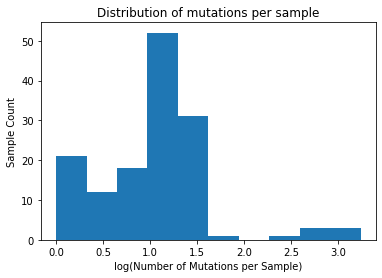

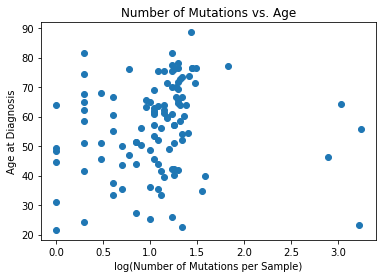

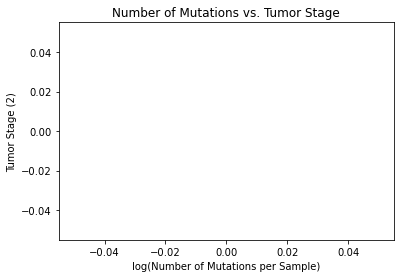

SKCM.somatic.maf.short.gz :
Range: 18058 
Mean: 724.8394004282655


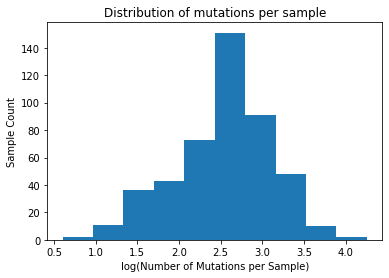

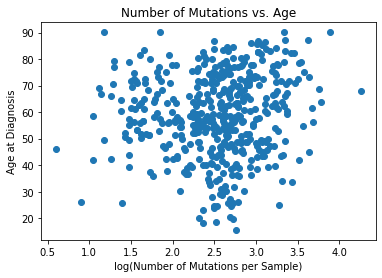

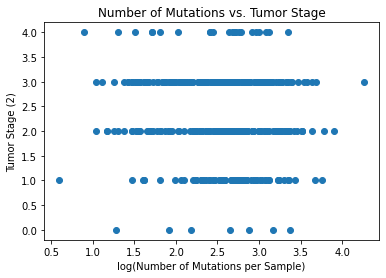

ACC.somatic.maf.short.gz :
Range: 2038 
Mean: 94.08695652173913


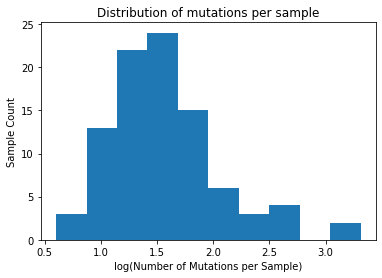

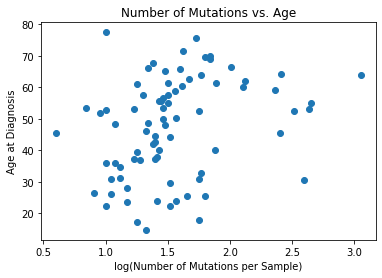

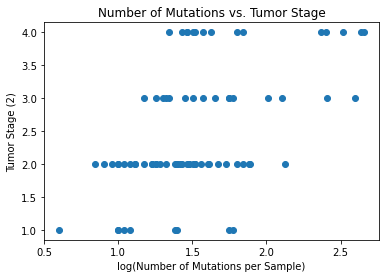

BRCA.somatic.maf.short.gz :
Range: 6045 
Mean: 97.69644670050761


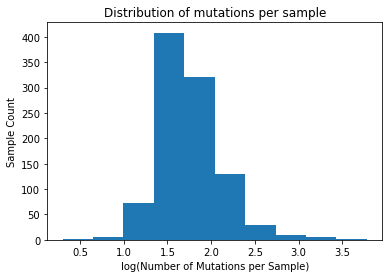

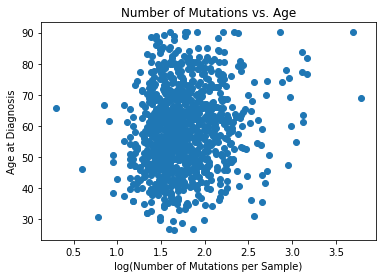

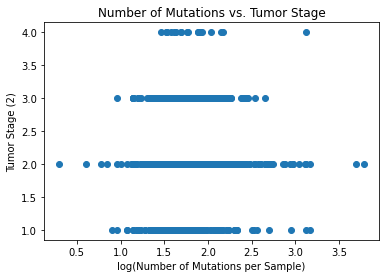

In [3]:
for f in files:
    if (f.endswith('.somatic.maf.short.gz')): #for each somatic short file...
        print(f, ':')
        somatic = pd.read_csv(f, sep='\t', compression='gzip')
        mut_cnt = pd.DataFrame(somatic.sample_id.value_counts()) #creating mut_cnt DF
        
        #counts
        rang = max(mut_cnt.sample_id) - min(mut_cnt.sample_id)
        a = mut_cnt.sample_id.mean()
        print('Range:', rang, '\nMean:', a)
        
        #frequency distributions
        mut_cnt.sample_id.apply(np.log10).plot(kind='hist')
        plt.xlabel('log(Number of Mutations per Sample)')
        plt.ylabel('Sample Count')
        plt.title('Distribution of mutations per sample')
        plt.show()
        
        #merge with clinical short on patients
        pattern = "(^[\w\d]+\-[\w\d]+\-[\w\d]+)\-"
        patientIDs = [re.findall(pattern, string)[0] for string in mut_cnt.index]
        mut_cnt['patient'] = patientIDs
        
        f_clinical = f.replace('.somatic.maf.short.gz', '.newclinical.short.txt')
        clinical_short = pd.read_csv(f_clinical, sep='\t', index_col=0)
        clinical_mut = clinical_short.join(mut_cnt.set_index('patient'), on='patient', how='inner')
        f_out = f.replace('.somatic.maf.short.gz', '.clinical_mut.csv')
        clinical_mut.to_csv(f_out, index=False, sep='\t')
        
        #plots
        plt.scatter(clinical_mut['sample_id'].apply(np.log10) ,clinical_mut['age_at_diagnosis']); 
        plt.xlabel('log(Number of Mutations per Sample)')
        plt.ylabel('Age at Diagnosis')
        plt.title('Number of Mutations vs. Age')
        plt.show()
        
        plt.scatter(clinical_mut['sample_id'].apply(np.log10), clinical_mut['tumor_stage_2'])
        plt.xlabel('log(Number of Mutations per Sample)')
        plt.ylabel('Tumor Stage (2)')
        plt.title('Number of Mutations vs. Tumor Stage')
        plt.show()